In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'fecha':str, 'precio':int}
dolar_data = pd.read_csv("..\..\data\TP2\dolar_mexico.csv", encoding='latin-1', sep = ',')
dolar_data.columns = ['fecha', 'dolar']

training_data = pd.read_csv('../../data/TP2/train.csv', dtype = types, usecols=['id', 'fecha', 'precio'])
test_data = pd.read_csv('../../data/TP2/test.csv', dtype = types, usecols=['id', 'fecha'])

In [3]:
dolar_data['fecha'] = dolar_data['fecha'].apply(lambda x: x[6:10] + '-' + x[3:5] + '-' + x[0:2])

training_data['fecha'] = training_data['fecha'].apply(lambda x: x[0:10])
test_data['fecha'] = test_data['fecha'].apply(lambda x: x[0:10])

Plot del dolar en funcion de la fecha

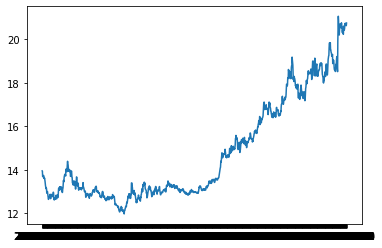

In [4]:
x = dolar_data.fecha
y = dolar_data.dolar
plt.plot(x,y)

In [5]:
dolar_data.fecha[0]

'2012-01-01'

In [6]:
training_data.fecha[0]

'2015-08-23'

In [7]:
def encode_date(date):
    numbers = date.split('-')
    day = numbers[2]
    month = numbers[1]
    year = numbers[0]
    return int(year+month+day)

In [8]:
def to_date(fecha):
    return str(fecha)[0:4]+'-'+str(fecha)[4:6]+'-'+str(fecha)[6:8]

In [9]:
fechas_a_predecir = training_data.merge(dolar_data, on='fecha',how='left')

In [10]:
fechas_a_predecir = fechas_a_predecir[fechas_a_predecir['dolar'].isnull()].fecha.unique().tolist()

In [11]:
len(fechas_a_predecir)

568

 Codifico las fechas para poder usar el interpolador

In [12]:
fechas_codificadas = []
for fecha in fechas_a_predecir:
    fechas_codificadas.append(encode_date(fecha))

In [13]:
len(fechas_codificadas) 

568

Creo el interpolador con los datos que tengo:  x = fechas codificadas, y = pesos mexicanos

In [14]:
x = dolar_data.fecha.apply(lambda x: encode_date(x)).to_list()
y = dolar_data.dolar.to_list()

In [15]:
x[0:10]

[20120101,
 20120102,
 20120103,
 20120104,
 20120105,
 20120106,
 20120109,
 20120110,
 20120111,
 20120112]

In [16]:
f2 = interp1d(x, y, kind='previous')

In [17]:
pesos_estimados = []
for fecha in fechas_codificadas:
    pesos_estimados.append([to_date(fecha), f2(fecha).tolist()])

In [18]:
pesos_estimados.sort()
pesos_estimados[0:10]

[['2012-01-07', 13.7228],
 ['2012-01-08', 13.7228],
 ['2012-01-14', 13.6263],
 ['2012-01-15', 13.6263],
 ['2012-01-21', 13.224],
 ['2012-01-22', 13.224],
 ['2012-01-28', 12.9504],
 ['2012-01-29', 12.9504],
 ['2012-02-04', 12.712],
 ['2012-02-05', 12.712]]

In [19]:
pesos_estimadosDF = pd.DataFrame(pesos_estimados, columns=["fecha","dolar"])

In [20]:
pesos_estimadosDF

,fecha,dolar
0,2012-01-07,13.7228
1,2012-01-08,13.7228
2,2012-01-14,13.6263
3,2012-01-15,13.6263
4,2012-01-21,13.2240
...,...,...
563,2016-12-12,20.3305
564,2016-12-17,20.4280
565,2016-12-18,20.4280
566,2016-12-24,20.6271


In [21]:
estimados_mas_originales = dolar_data.append(pesos_estimadosDF)

In [22]:
estimados_mas_originales

,fecha,dolar
0,2012-01-01,13.9547
1,2012-01-02,13.9342
2,2012-01-03,13.6882
3,2012-01-04,13.7144
4,2012-01-05,13.7409
...,...,...
563,2016-12-12,20.3305
564,2016-12-17,20.4280
565,2016-12-18,20.4280
566,2016-12-24,20.6271


In [23]:
training_data = training_data.merge(estimados_mas_originales, on='fecha', how='left')

Verifico que se hayan completado los nulls

In [24]:
training_data.dolar.isnull().sum()

0

In [25]:
training_data

,id,fecha,precio,dolar
0,254099,2015-08-23,2273000,16.9171
1,53461,2013-06-28,3600000,13.0279
2,247984,2015-10-17,1200000,16.3959
3,209067,2012-03-09,650000,12.6299
4,185997,2016-06-07,1150000,18.5067
...,...,...,...,...
239995,119879,2015-02-08,650000,14.9024
239996,259178,2014-07-10,1940000,13.0015
239997,131932,2015-03-03,3400000,14.9544
239998,146867,2014-12-26,2890000,14.6955


Me fijo si tengo nulls en test_data

In [26]:
test_data = test_data.merge(estimados_mas_originales, on='fecha', how='left')

In [27]:
test_data.dolar.isnull().sum()

0

In [28]:
test_data = test_data[["id","dolar"]]
training_data = training_data[["id","dolar"]]

In [29]:
training_data.to_csv('../../res/ftr/dolar_for_date_train.csv')
test_data.to_csv('../../res/ftr/dolar_for_date_evaluation.csv')

In [30]:
test_data.shape

(60000, 2)

In [31]:
training_data.shape

(240000, 2)